In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 0).astype(np.float64)  #Iris-Setosa

In [3]:
svm_clf = Pipeline ((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=10000))
    ))

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [4]:
svm_clf.predict([[1.2, 0.5]])

array([1.])

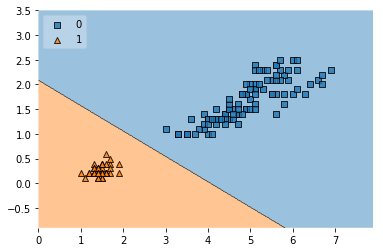

In [5]:
fig = plot_decision_regions(X=X, y=y.astype(np.integer), clf=svm_clf,legend=2)

In [6]:
svc = Pipeline ((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='linear', C=5))
    ))

svc.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [7]:
svc.predict([[1.2, 0.5]])

array([1.])

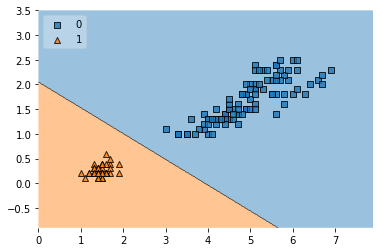

In [8]:
fig = plot_decision_regions(X=X, y=y.astype(np.integer), clf=svc,legend=2)

In [9]:
SGD = Pipeline ((
        ("scaler", StandardScaler()),
        ("SGD_clf", SGDClassifier())
    ))

SGD.fit(X, y)

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGD_clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [10]:
SGD.predict([[1.2, 0.5]])

array([1.])

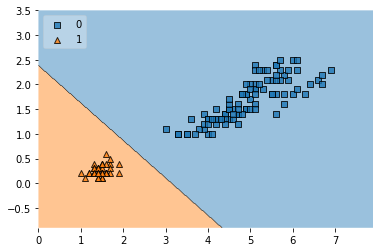

In [11]:
fig = plot_decision_regions(X=X, y=y.astype(np.integer), clf=SGD,legend=2)

In [12]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [13]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
    
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [14]:
X, y = mnist["data"], mnist["target"]
shuffle_index = np.random.permutation(60000)
X, y = X[shuffle_index], y[shuffle_index]

In [15]:
y[36000]

3

In [16]:
svc_mnist = SVC(C=5, kernel='poly', degree=3, decision_function_shape='ovr')
#svc_mnist.fit(X, y)

In [17]:
cross_val_score(svc_mnist, X, y, cv=3, scoring="accuracy", n_jobs=-1)

array([0.9760048 , 0.97644882, 0.97514627])